In [1]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 514.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
# -----------------------------------------
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
#-------------------------------------------
sns.set()

In [3]:
hood = pd.read_csv('../input/robinhood-stock-data/HOOD.csv')
hood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        268 non-null    object 
 1   close_last  268 non-null    float64
 2   volume      268 non-null    int64  
 3   open        268 non-null    float64
 4   high        268 non-null    float64
 5   low         268 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.7+ KB


In [4]:
hood = hood.rename(columns={'close_last' : 'close'})
hood.date =pd.to_datetime(hood.date)
hood = hood.sort_values('date')
hood.head()

,date,close,volume,open,high,low
267,2021-07-29,34.82,102474700,38.00,40.25,33.35
266,2021-07-30,35.15,40632230,34.93,36.98,33.25
265,2021-08-02,37.68,19948530,35.97,37.98,35.30
264,2021-08-03,46.80,93819200,37.91,48.59,37.16
263,2021-08-04,70.39,175790500,54.45,85.00,54.40


In [5]:
df = hood[['date', 'close']]
df.set_index('date', inplace=True)
df.head()

,close
date,
2021-07-29,34.82
2021-07-30,35.15
2021-08-02,37.68
2021-08-03,46.80
2021-08-04,70.39


### *Global Statistics:*

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
close,268.00,21.56,14.50,6.89,10.30,13.52,35.45,70.39


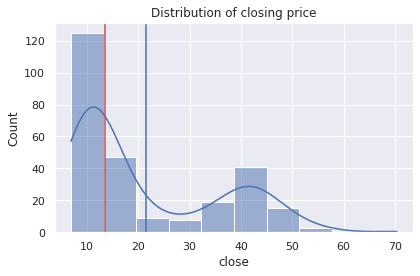

In [7]:
sns.histplot(data=df, x='close', kde=True)
plt.axvline(df.close.mean())
plt.axvline(df.close.median(), c='r')
plt.title('Distribution of closing price')
plt.tight_layout();

In [8]:
px.box(data_frame=df, x='close', title= 'Checking Outliers')

There are no Outliers based on above boxplot

In [9]:
px.line(data_frame=df, title='The movement of HOOD Stock')

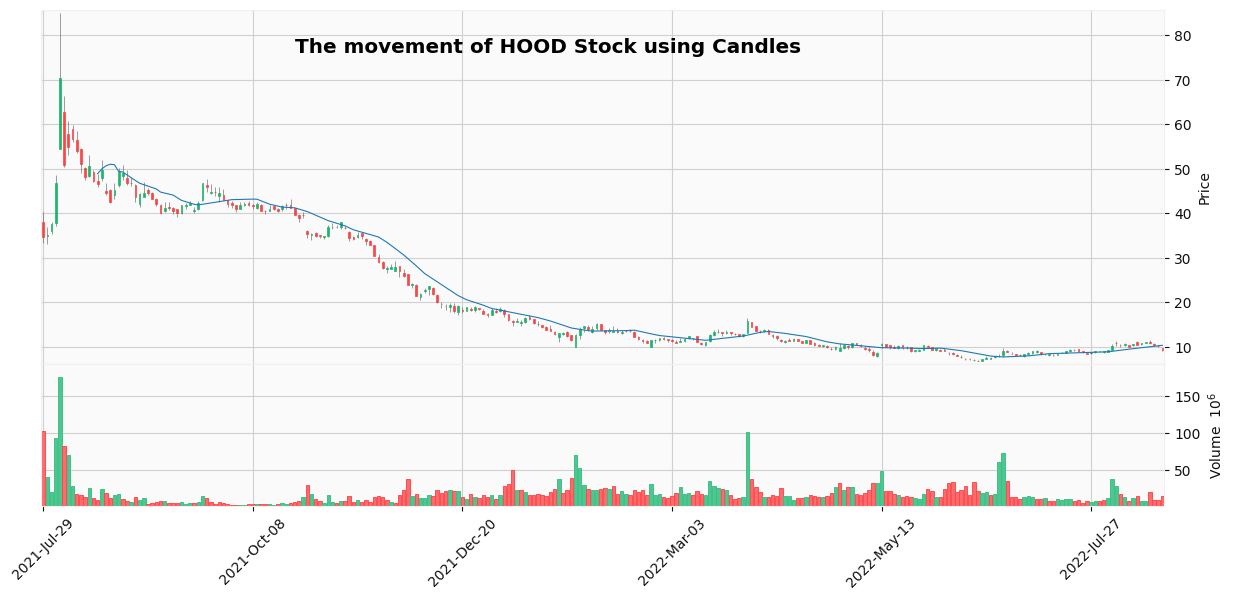

In [10]:
hood = hood.set_index('date')
mpf.plot(hood, type = 'candle', volume=True, mav= (14), title='The movement of HOOD Stock using Candles',tight_layout=True, figratio=(18,8), style='yahoo')

# - Metrics
> * Daily Returns 
> * Cummulative Returns
> * Sharpe Ratio

### <font color='orange'>Daily returns ratio:</font> is how much did the price go up or down on a particular day 
$$Daily Returns (t) = (price[t] / price[t-1]) - 1$$

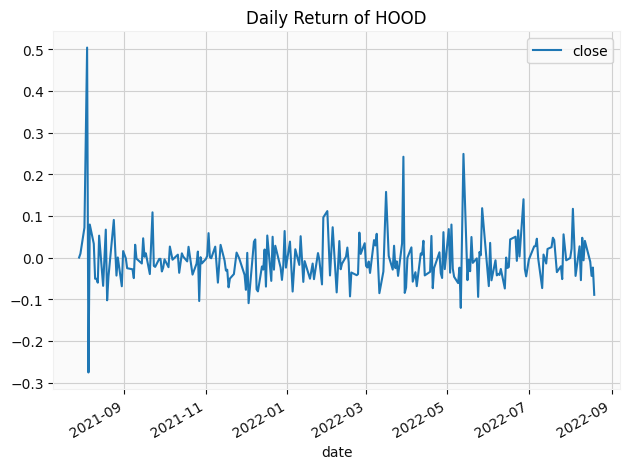

In [11]:
dr = (df / df.shift(1)) -1
dr.iloc[0,:] = 0
dr.plot(title = 'Daily Return of HOOD')
plt.tight_layout();

*Daily return statistics*<br>
1- **The Mean** <br>
2- **Standard Deviation** <br>
3- **Kurtosis:** tell us about the `tails of the normal distribution`. the measure of Kurtosis tells us how much `different` our histogram is from that traditional normal distribution.<br><br>
<font color='skyblue'>Types of Kurtosis:</font> <br>

> **Fat tails (value is positive)**: means that there are occasional and more frequent that would happen if we had a regular Gaussin distribution. There are frequently large excursions more frequently than if this was a normal distribution. (More occurrences out in the tails than would be expected if it were a normal distribution).<br><br>

> **Skinny tails (value is negative)**: (Many fewer occurrences out on the tails than would be expected if it were a normal distribution).<br><br>

In [12]:
print('MEAN of DR= ', dr.close.mean())
print('STD of DR= ', dr.close.std())
print('Kurtosis of DR= ', dr.close.kurtosis())

MEAN of DR=  -0.0030715388364215635
STD of DR=  0.0632319102476208
Kurtosis of DR=  17.78235070650503


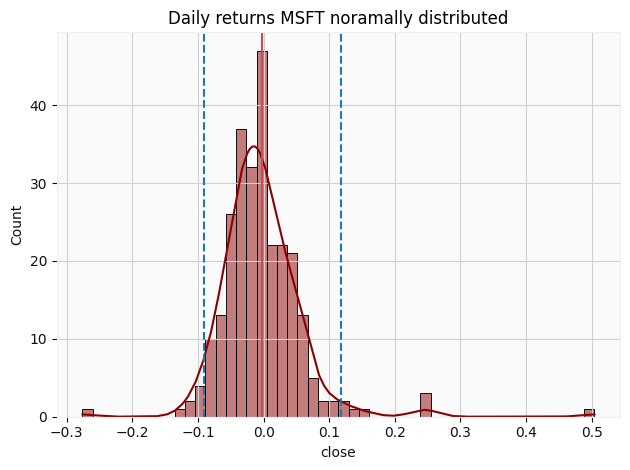

In [13]:
sns.histplot(dr.close,bins=50, kde=True, color='darkred')
plt.title('Daily returns MSFT noramally distributed')
plt.axvline(np.percentile(dr.close,97.5), linestyle='--')
plt.axvline(np.percentile(dr.close,2.5), linestyle='--')
plt.axvline(dr.close.mean(), c='r')
plt.tight_layout();

Based on Kurtosis results: More occurrences out in the tails than would be expected if it were a normal distribution.

---------------------------------------------------------------------

### <font color='orange'>Cumulative returns ratio:</font> is the **Profit/Loss** ratio of the stock on a particular period.
**$$ CR (t) = (price[t] / price[0]) - 1$$**
### <center>OR</center>
**$$ CR (t) = (price[t] - price[0]) price[0]$$**

In [14]:
print('Cumulative return of HOOD is: {} %'.format(round(((df.iloc[-1]['close'] / df.iloc[0]['close']) - 1) * 100),2))

Cumulative return of HOOD is: -73 %


`HOOD` stock price decreased almost 73% during the period

### <font color='orange'>Sharpe ratio:</font> <br>
is a metric that evaluates risk and returns together in order to help investors in the selection of such investment that generates higher returns for the optimal risk taken.<br><br>
*<font color='red'>For comparison:*</font> The Higher the sharpe ratio the better <br>
$$Sharpe Ratio = \frac{μ_{PDR} - RFR} {σ_{PDR}}$$
*The Sharpe ratio* can be annualized by multiplying the above ratio by the `square root of 252` as shown below.<br>
$$Sharpe Ratio =\sqrt{252} * \frac{μ_{PDR} - RFR} {σ_{PDR}}$$

Resources:<br>
[efinancemanagement](https://efinancemanagement.com/calculator/sharpe-ratio-2#:~:text=Sharpe%20ratio%20calculator%20is%20an%20online%20tool%20for,asset%20helps%20in%20generating%20higher%20returns%20or%20not.)<br>
[investopedia](https://www.investopedia.com/terms/s/sharperatio.asp)

In [15]:
SR = round(np.sqrt(252) * (np.mean(dr.close))/ np.std(dr.close),2) # assuming RFR = 0
print('Sharpe Ratio = {}%'.format(SR),)

Sharpe Ratio = -0.77%
